In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Función para cargar y procesar imágenes
def load_and_preprocess_images(data_path, image_size):
    images = []
    labels = []
    class_names = os.listdir(data_path)
    
    for class_name in class_names:
        class_path = os.path.join(data_path, class_name)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Cambia a escala de grises
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Cambia el espacio de color a RGB
            img = cv2.resize(img, image_size)  #Cambia el tamaño de la imagen
            #img = cv2.GaussianBlur(img, (5, 5), 0) #Reducción de ruido
            #img = img / 255.0 #Normalización de pixeles
            
            images.append(img)
            labels.append(class_name)
    
    return np.array(images), np.array(labels)

In [3]:
# Define las rutas de tus datasets
training_data_path = r'D:\PERSONAL\MODELOS DE DATOS\PROYECTO FINAL\Dataset\train'
testing_data_path = r'D:\PERSONAL\MODELOS DE DATOS\PROYECTO FINAL\Dataset\test'

In [4]:
# Carga y preprocesa imágenes de entrenamiento
image_size = (64, 64)  # Ajusta el tamaño según tus necesidades
X_train, y_train = load_and_preprocess_images(training_data_path, image_size)

# Codificación one-hot para las etiquetas
class_names = np.unique(y_train)
num_classes = len(class_names)
y_train = tf.keras.utils.to_categorical(np.searchsorted(class_names, y_train), num_classes)

# Divide el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Carga y preprocesa imágenes de prueba
X_test, y_test = load_and_preprocess_images(testing_data_path, image_size)

# Codificación one-hot para las etiquetas de prueba
y_test = tf.keras.utils.to_categorical(np.searchsorted(class_names, y_test), num_classes)

In [6]:
#Arquitectura del modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Muestra un resumen del modelo
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)       

In [7]:
# Aumento de datos
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)




In [8]:
# Entrena el modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))
# Entrenamiento con aumento de datos y EarlyStopping
#history = model.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=100, validation_data=(X_val, y_val))



Epoch 1/100


41/41 [==============================] - 4s 58ms/step - loss: 8.1249 - accuracy: 0.5168 - val_loss: 0.8609 - val_accuracy: 0.6942
Epoch 2/100
41/41 [==============================] - 2s 45ms/step - loss: 0.8003 - accuracy: 0.7221 - val_loss: 0.7425 - val_accuracy: 0.7156
Epoch 3/100
41/41 [==============================] - 2s 46ms/step - loss: 0.4919 - accuracy: 0.8201 - val_loss: 0.6700 - val_accuracy: 0.7737
Epoch 4/100
41/41 [==============================] - 2s 49ms/step - loss: 0.5338 - accuracy: 0.8139 - val_loss: 0.4487 - val_accuracy: 0.8379
Epoch 5/100
41/41 [==============================] - 2s 46ms/step - loss: 0.3822 - accuracy: 0.8484 - val_loss: 0.5665 - val_accuracy: 0.7920
Epoch 6/100
41/41 [==============================] - 2s 44ms/step - loss: 0.3110 - accuracy: 0.8851 - val_loss: 0.4423 - val_accuracy: 0.8287
Epoch 7/100
41/41 [==============================] - 2s 44ms/step - loss: 0.2297 - accuracy: 0.9227 - val_loss: 0.5645 - val_accuracy: 0.8593
Epoc

41/41 [==============================] - 1s 13ms/step


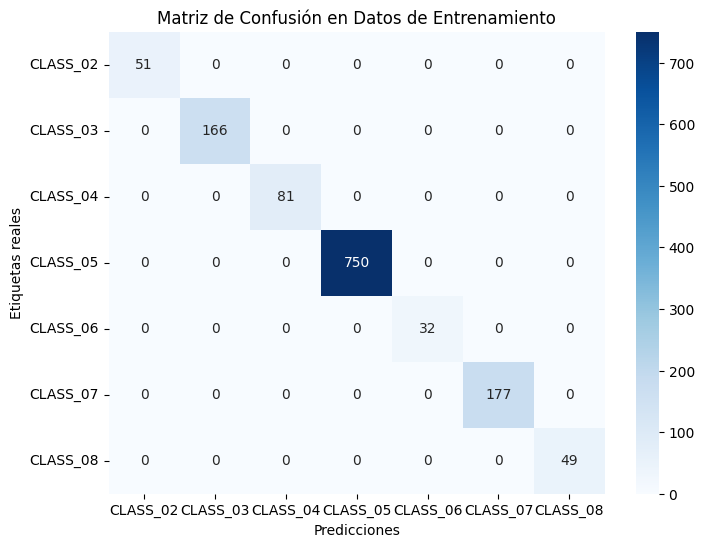

Matriz de confusión en datos de entrenamiento:
[[ 51   0   0   0   0   0   0]
 [  0 166   0   0   0   0   0]
 [  0   0  81   0   0   0   0]
 [  0   0   0 750   0   0   0]
 [  0   0   0   0  32   0   0]
 [  0   0   0   0   0 177   0]
 [  0   0   0   0   0   0  49]]

Reporte de clasificación en datos de entrenamiento:
              precision    recall  f1-score   support

    CLASS_02       1.00      1.00      1.00        51
    CLASS_03       1.00      1.00      1.00       166
    CLASS_04       1.00      1.00      1.00        81
    CLASS_05       1.00      1.00      1.00       750
    CLASS_06       1.00      1.00      1.00        32
    CLASS_07       1.00      1.00      1.00       177
    CLASS_08       1.00      1.00      1.00        49

    accuracy                           1.00      1306
   macro avg       1.00      1.00      1.00      1306
weighted avg       1.00      1.00      1.00      1306



In [9]:
# Evalúa el modelo en los datos de entrenamiento
y_train_pred = model.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_classes = np.argmax(y_train, axis=1)

# Matriz de confusión y reporte de clasificación en datos de entrenamiento
confusion_train = confusion_matrix(y_train_classes, y_train_pred_classes)
classification_report_train = classification_report(y_train_classes, y_train_pred_classes, target_names=class_names)

# Visualización de la matriz de confusión para entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_train, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión en Datos de Entrenamiento')
plt.show()

print("Matriz de confusión en datos de entrenamiento:")
print(confusion_train)
print("\nReporte de clasificación en datos de entrenamiento:")
print(classification_report_train)

26/26 [==============================] - 0s 12ms/step


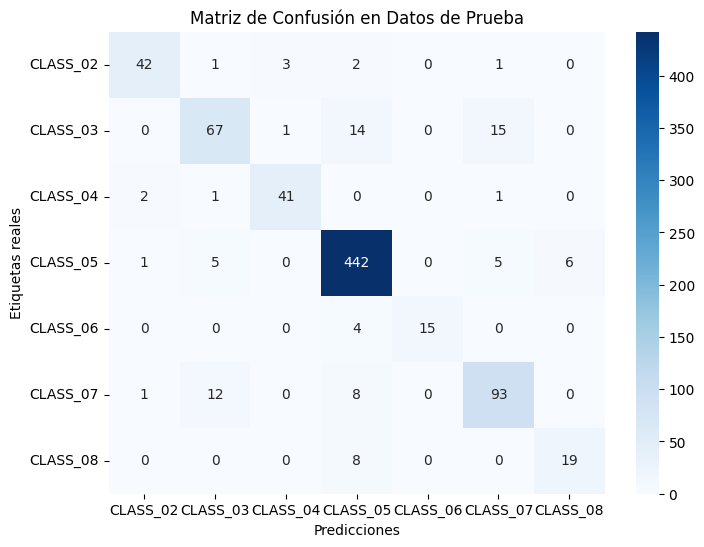

Matriz de confusión en datos de prueba:
[[ 42   1   3   2   0   1   0]
 [  0  67   1  14   0  15   0]
 [  2   1  41   0   0   1   0]
 [  1   5   0 442   0   5   6]
 [  0   0   0   4  15   0   0]
 [  1  12   0   8   0  93   0]
 [  0   0   0   8   0   0  19]]

Reporte de clasificación en datos de prueba:
              precision    recall  f1-score   support

    CLASS_02       0.91      0.86      0.88        49
    CLASS_03       0.78      0.69      0.73        97
    CLASS_04       0.91      0.91      0.91        45
    CLASS_05       0.92      0.96      0.94       459
    CLASS_06       1.00      0.79      0.88        19
    CLASS_07       0.81      0.82      0.81       114
    CLASS_08       0.76      0.70      0.73        27

    accuracy                           0.89       810
   macro avg       0.87      0.82      0.84       810
weighted avg       0.89      0.89      0.89       810



In [10]:
# Evalúa el modelo en los datos de prueba
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Matriz de confusión y reporte de clasificación en datos de prueba
confusion_test = confusion_matrix(y_test_classes, y_test_pred_classes)
classification_report_test = classification_report(y_test_classes, y_test_pred_classes, target_names=class_names)

# Visualización de la matriz de confusión para prueba
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión en Datos de Prueba')
plt.show()

print("Matriz de confusión en datos de prueba:")
print(confusion_test)
print("\nReporte de clasificación en datos de prueba:")
print(classification_report_test)